# Insurance Dataset

# Objective

The goal is to analyze and build predictive models for estimating insurance charges

# Import Libraries and Dataset

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [19]:
insurance = pd.read_csv(r"C:\Users\Bebo Amro\Desktop\Insurance Dataset\dataset\insurance.csv")

# Data Explore

In [20]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [21]:
insurance.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [22]:
insurance.shape

(1338, 7)

In [23]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [24]:
insurance["sex"].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

In [25]:
insurance["smoker"].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [26]:
insurance["region"].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

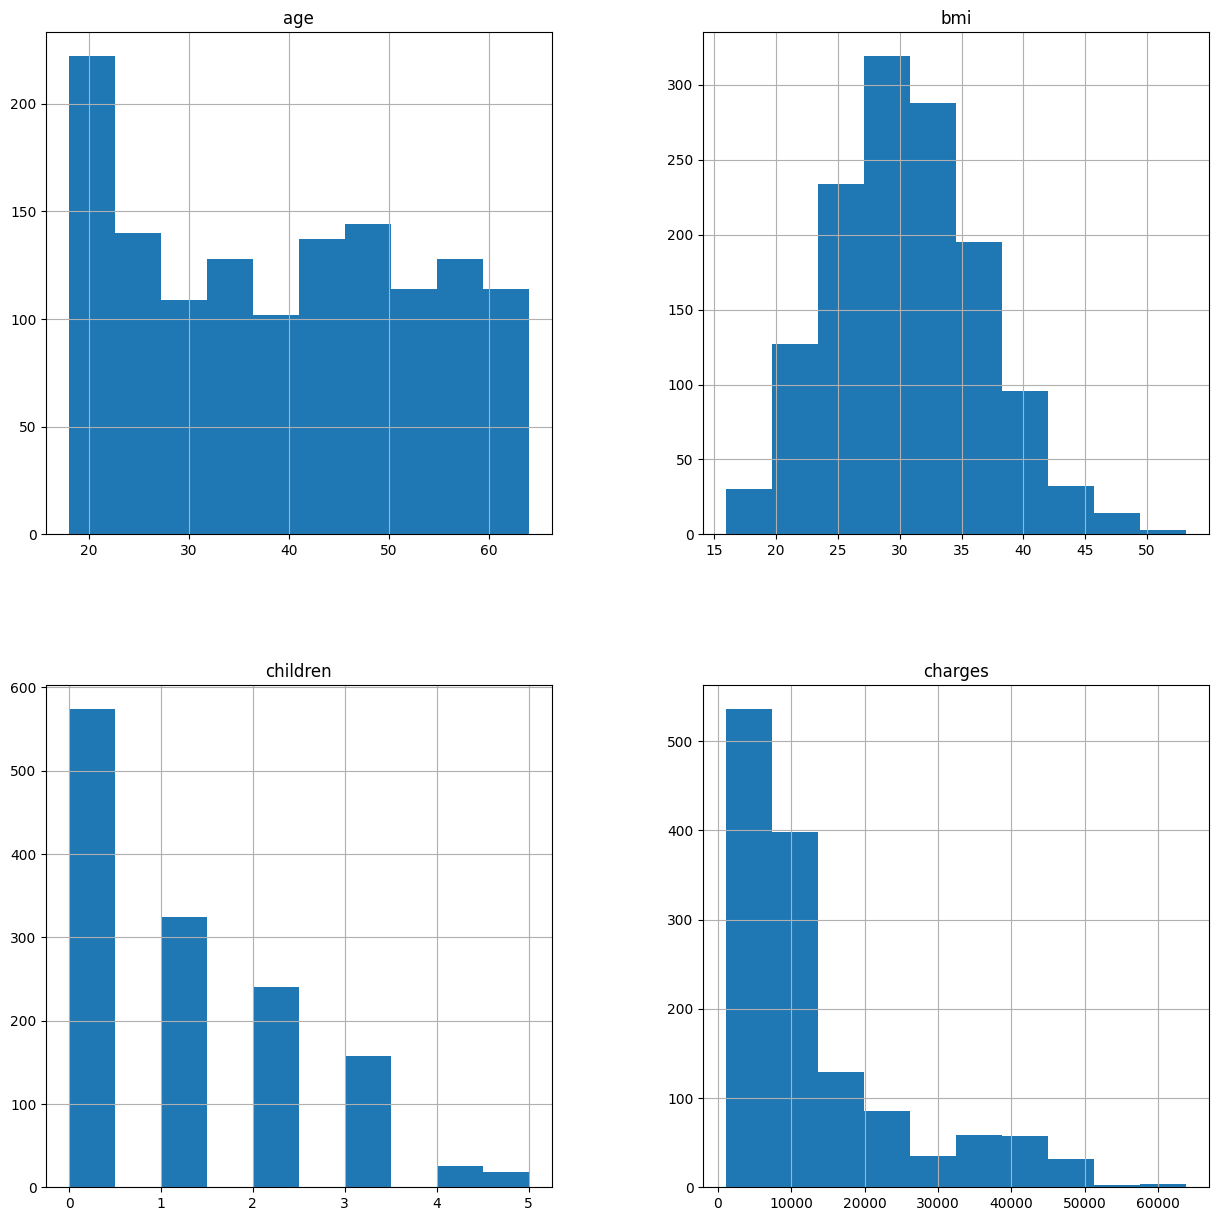

In [27]:
insurance.hist(figsize=(15,15))
plt.show()

In [28]:
insurance.duplicated().sum()
insurance.drop_duplicates()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


<Axes: >

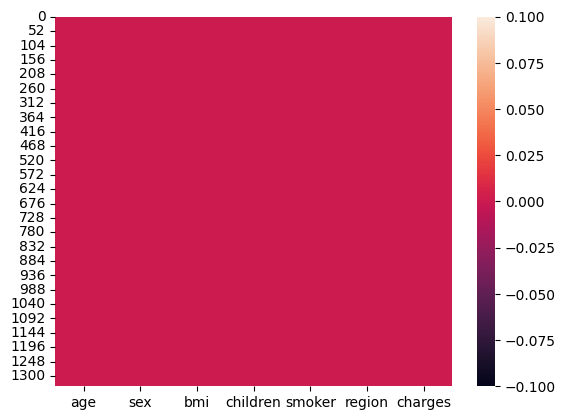

In [29]:
sns.heatmap(insurance.isnull())

<Axes: xlabel='age', ylabel='charges'>

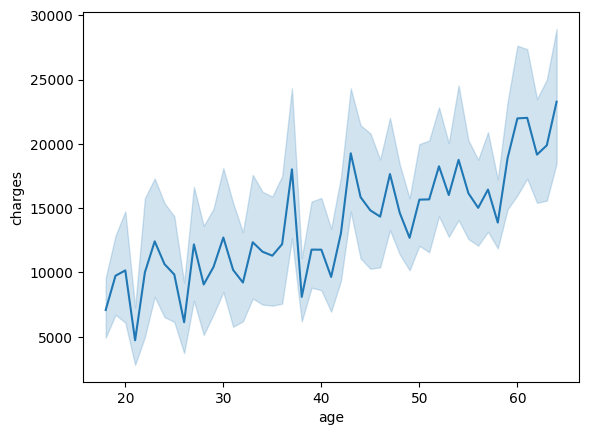

In [30]:
sns.lineplot(x=insurance["age"], y=insurance["charges"], data=insurance)

<Axes: xlabel='region', ylabel='charges'>

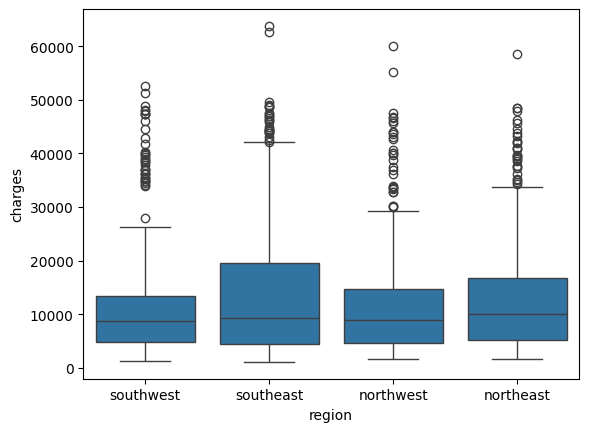

In [31]:
sns.boxplot(data = insurance , x = 'region',y='charges')
# plt.title()

# Data Preprocessing

In [32]:


label_encoder = preprocessing.LabelEncoder()
insurance["sex"] = label_encoder.fit_transform(insurance["sex"])
insurance["smoker"] = label_encoder.fit_transform(insurance["smoker"])
insurance["region"] = label_encoder.fit_transform(insurance["region"])
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


<Axes: >

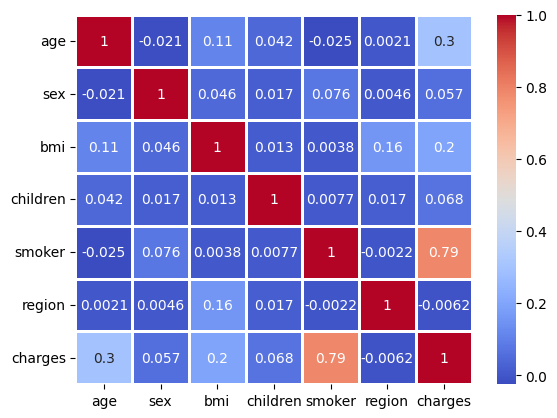

In [33]:
corr = insurance.corr()
sns.heatmap(corr,annot=True,linewidths=1,cmap='coolwarm')

In [34]:
x = insurance.drop("charges", axis=1)
y = insurance["charges"]

In [35]:
x

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1
1334,18,0,31.920,0,0,0
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,3


In [36]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [37]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [38]:
x_train

,age,sex,bmi,children,smoker,region
532,59,1,29.700,2,0,2
1242,22,0,21.280,3,0,1
403,49,1,32.300,3,0,1
1126,55,1,29.900,0,0,3
36,62,0,32.965,3,0,1
...,...,...,...,...,...,...
237,31,1,38.390,2,0,2
978,45,0,39.995,3,0,0
1289,44,1,34.320,1,0,2
665,43,1,38.060,2,1,2


In [39]:
y_train

532     12925.88600
1242     4296.27120
403     10269.46000
1126    10214.63600
36      15612.19335
           ...     
237      4463.20510
978      9704.66805
1289     7147.47280
665     42560.43040
1271     3021.80915
Name: charges, Length: 1070, dtype: float64

# Model Apply

In [40]:
model1 = RandomForestRegressor(
    n_estimators=100, 
    random_state=42, 
    max_depth=10
    )

In [41]:
model1.fit(x_train, y_train)

RandomForestRegressor(max_depth=10, random_state=42)

In [42]:
y_predict = model1.predict(x_test)

In [43]:
model1.score(x_test, y_test)

0.7793478344193631

In [44]:
mae = mean_absolute_error(y_test, y_predict)
mse = mean_squared_error(y_test, y_predict)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_predict)
print('Model Performance Metrics:')
print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')

Model Performance Metrics:
Mean Absolute Error: 2982.9643461166625
Root Mean Squared Error: 5229.77747729162
R-squared: 0.7793478344193631


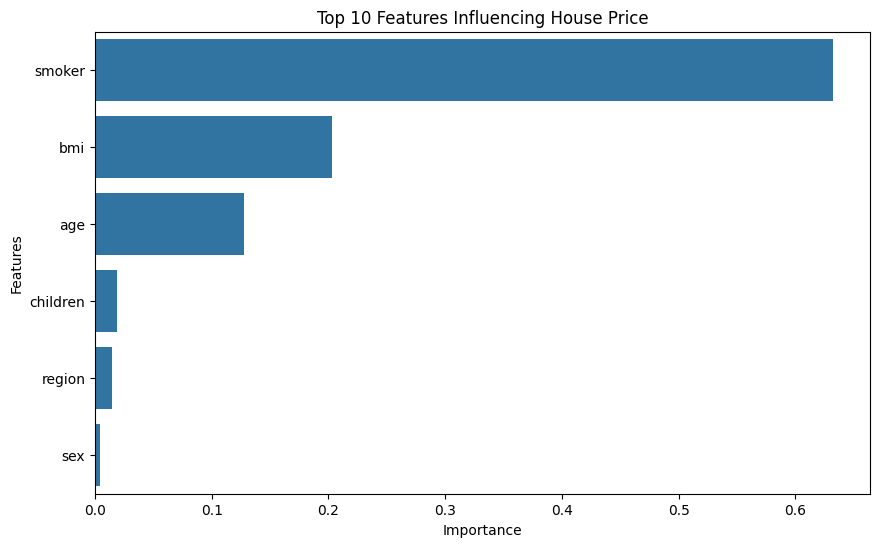

In [45]:
feature_importance = pd.DataFrame({
    'feature': x.columns,
    'importance': model1.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance.head(10))
plt.title('Top 10 Features Influencing House Price')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

In [46]:
# Save model and preprocessing artifacts
import joblib

joblib.dump(model1, '../src/trained_model.pkl')

with open('../src/feature_names.txt', 'w') as f:
    f.write('\n'.join(x.columns))